In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Bilinear model

Illustrate latent variable models with a simple bilinear model $x_i\approx wz_i$ where $x_i$ is a 1-dimensional observation, $w$ is an unobserved weight and $z_i$ is a latent variable

We have $x_i\sim N(wz_i, \lambda_{noise}^{-1})$, $w\sim N(\mu_w, \lambda_w^{-1})$ and $z_i\sim N(\mu_z, \lambda_z^{-1})$

In [110]:
def gibbsSample(x, w, z, lambda_noise, mu_w, lambda_w, mu_z, lambda_z):
    n = x.shape[0]
    S_z = (lambda_z + lambda_noise*w**2)**(-1)
    for i in range(n):
        m_z = S_z*(lambda_z*mu_z + lambda_noise*x[i]*w)
        z[i] = np.random.normal(m_z, S_z)
    S_w = (lambda_w + lambda_noise*np.sum(np.power(z, 2)))**(-1)
    m_w = S_w*(lambda_w*mu_w + lambda_noise*np.sum(x*z))
    w = np.random.normal(m_w, S_w)
    return w, z

In [199]:
x = np.array([15])
n = x.shape[0]

w_init = np.random.normal()
z_init = np.array(np.random.normal(size=(n, 1)))



lambda_noise = 0.5
mu_w = 0
lambda_w = 0.5
mu_z = 0
lambda_z = 0.5

n_iter = 25000
n_burnin = 5000
thinning = 10

w_samples = float('nan')*np.ones((int(np.floor(n_iter/thinning)), 1))
z_samples = float('nan')*np.ones((int(np.floor(n_iter/thinning)), n))

w_new = w_init
z_new = z_init
ind = 0

for i in range(n_burnin):
    w_new, z_new = gibbsSample(x, w_new, z_new, lambda_noise, mu_w, lambda_w, mu_z, lambda_z)
for i in range(n_iter):
    w_new, z_new = gibbsSample(x, w_new, z_new, lambda_noise, mu_w, lambda_w, mu_z, lambda_z)
    if i % thinning == 0:
        w_samples[ind,:] = w_new
        z_samples[ind,:] = z_new.T
        ind = ind+1

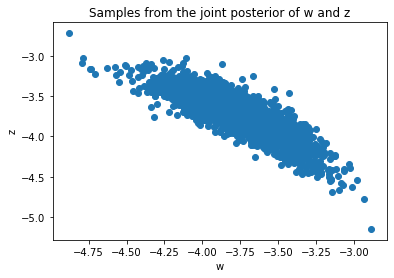

In [200]:
plt.scatter(w_samples, z_samples[:, 0])
plt.xlabel('w')
plt.ylabel('z')
plt.title('Samples from the joint posterior of w and z')
plt.show()

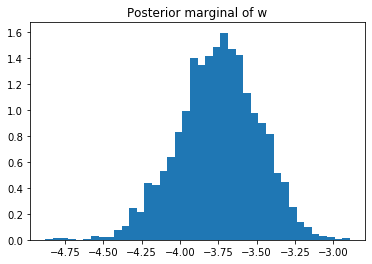

In [201]:
hist, bin_edges, patches = plt.hist(x=w_samples, bins='auto', density=True)
plt.title('Posterior marginal of w')
plt.show()

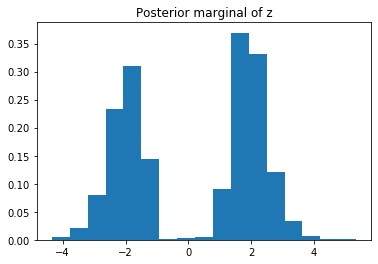

In [114]:
hist, bin_edges, patches = plt.hist(x=z_samples[:, 0], bins='auto', density=True)
plt.title('Posterior marginal of z')
plt.show()

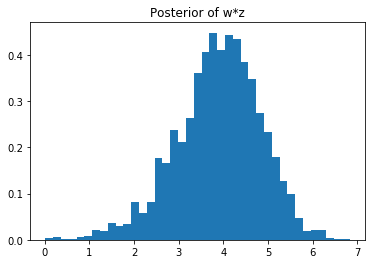

In [115]:
t = w_samples*z_samples

hist, bin_edges, patches = plt.hist(x=t, bins='auto', density=True)
plt.title('Posterior of w*z')
plt.show()

In [116]:
# Prediction using means
w_mean = np.mean(w_samples)
z_mean = np.mean(z_samples)

pred = w_mean.T*z_mean
print('Prediction using posterior means: %s' % pred)
print('RMSE: %s' % np.sqrt(np.mean((x - pred)**2)))

Prediction using posterior means: 0.03233933689683233
RMSE: 4.9676606631031675
